<a href="https://colab.research.google.com/github/jugernaut/ProgramacionEnParalelo/blob/desarrollo/RedesNeuronales/05_RedNeuronalArtesanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Red Neuronal (artesanal)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón</i></h5>
    <h5 align="center"><i>Ayudante: Mario Arturo</i></h5>
  <h5 align="center"><i>Materia: Seminario de programación en paralelo</i></h5>
  </font>

# Introducción

Este material se generó con base en los video e ideas que se muestran en las referencias, para mayor detalle es necesario consultar las mismas.

# Planteamiento del problema

Vamos a generar una red neuronal que nos ayude a clasificar un conjunto de datos.

Para hacerlo un poco más interesante, pensemos que lo que estamos buscando es rescatar a los héroes de *Game of Thrones*, para ver un poco más de detalles al respecto visitar este [video](https://youtu.be/uwbHOpp9xkc?t=437).

La idea básica es encontrar una forma de delimitar a los datos de color salmón y los datos de color azul, de manera gráfica veríamos lo siguiente.

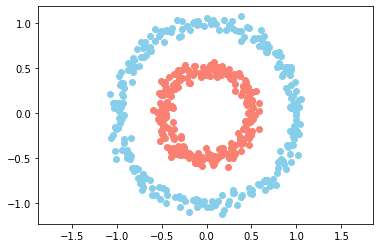

In [ ]:
# import de las bibliotecas necesarias
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# numero de muestras
n = 500
# tipo de datos
p = 2

# x=coordeadas, y=valores (adentro o fuera)
x, y = make_circles(n_samples=n, factor=0.5, noise=0.05)
y = y[:, np.newaxis]

# se grafican ambos conjuntos de datos
plt.scatter(x[y[:,0]==0 ,0], x[y[:,0]==0 ,1], c='skyblue')
plt.scatter(x[y[:,0]==1, 0], x[y[:,0]==1 ,1], c='salmon')
plt.axis("equal")
plt.show()

Imaginemos que los datos de color azul son los "enemigos" y los datos de color rojo son los "aliados".

Necesitamos definir un algoritmo que nos ayude a determinar si un par de coordenadas $(x, y)$ corresponden a un aliado ó a un enemigo.

Para tal propósito vamos a crear una red neuronal que nos ayude a clasificar a estos individuos.

# POO (paradigma orientado a objetos)

Para una mejor organización de los algoritmos que se mostrarán a continuación, lo mejor es hacer uso del paradigma orientado a objetos.

## CapaNeuronal

Esta clase nos proporciona la estructura de datos para almacenar y representar los componentes de la red.

### Pesos (w)

### Sesgos (b)

### Sesgos (b)

In [45]:
# clase para la clase de las capas

# define una estructura para una capa de la red
class CapaNeuronal():
  '''
  constructor
  n_conn: numero de conexiones entre las neuronas
  n_neur: numero de neuronas en la capa
  act_f:  funcion de activacion para esta capa
  '''
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    # bias para cada entrada de las neuronas
    # se multiplica por 2 y se resta menos 1 para moverlo al rango adecuado
    self.b = np.random.rand(1, n_neur) * 2 -1
    self.w = np.random.rand(n_conn, n_neur) * 2 -1

Veamos un ejemplo de la estructura de una capa.

In [48]:
capa = CapaNeuronal(3, 4, None)
# matiz de pesos de las conecciones con las neuronas
print(capa.w)
# vector columna que forma parte de la suma ponderada
print(capa.b)

[[ 0.20565542 -0.29401106  0.12260422 -0.54672729]
 [-0.48471538  0.45949189 -0.05489566  0.43469408]
 [ 0.84578523 -0.71938093 -0.26119288 -0.22019227]]
[[-0.03577045 -0.27174471 -0.14842959  0.7692891 ]]


## Función de activación

En este caso vamos a hacer uso de la función sigmoide y además mediante el mismo identificador de la función vamos a almacenar las derivada de dicha función, ya que se ocupará más adelante.

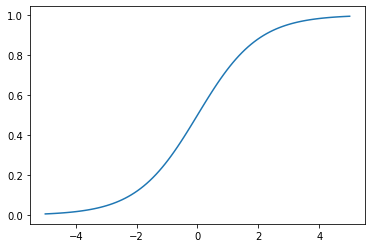

In [49]:
sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x *(1 - x))

_x = np.linspace(-5, 5, 100)

plt.plot(_x, sigm[0](_x))

## Esto va en la clase *RedNeuronal*

In [ ]:
Capa0 = CapaNeuronal(p, 4, sigm)
Capa1 = CapaNeuronal(4, 8, sigm)

def crear_rn(top, act_f):
  
  red_n = []

  for c, capa in enumerate(top[:-1]):
    red_n.append(CapaNeuronal(top[c], top[c+1], act_f))
  
  return red_n


In [ ]:
topologia = [p, 4, 8, 1]

red = crear_rn(topologia, sigm)

funcion_costo = (lambda Yp, Yr : np.mean((Yp - Yr)**2),
                 lambda Yp, Yr : (Yp - Yr))

def entrenamiento(red, x, y, f_costo, aprendizaje = 0.5, entrenar=True):

  salidas = [(None, x)]

  for c, capa in enumerate(red):
    # Paso hacia adelante, vector de entrada pasa capa por capa
    z = np.matmul(salidas[-1][1], red[c].w) + red[c].b
    a = red[c].act_f[0](z)
    salidas.append((z, a))

  if entrenar:
    #backpropagation
    deltas =[]
    for c in reversed(range(len(red))):
      z = salidas[c+1][0]
      a = salidas[c+1][1]

      if c == len(red) - 1:
        #calcular delta ultima capa
        deltas.insert(0, f_costo[1](a, y) * red[c].act_f[1](a))
      else:
        #calcular resto de las deltas 
        deltas.insert(0, deltas[0] @ _w.T * red[c].act_f[1](a)) 

      #variable temporal para no sobreescribir
      _w = red[c].w
      #descenso del gradiente
      red[c].b = red[c].b - np.mean(deltas[0], axis=0, keepdims=True)*aprendizaje
      red[c].w = red[c].w - salidas[c][1].T @ deltas[0] * aprendizaje

  return salidas[-1][1]

# Probando la red

Al ejecutar la siguiente celda, podémos ver como la red aprende y de forma iterativa disminuye el error.

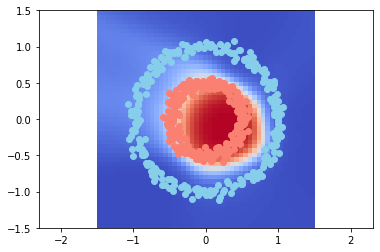

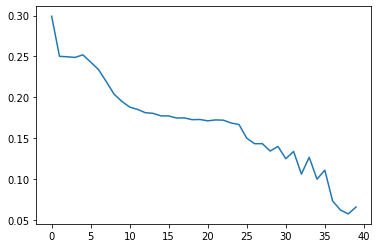

In [ ]:
import time
from IPython.display import clear_output

red = crear_rn(topologia, sigm)

perdida = []

for i in range(1000):
  py = entrenamiento(red, x, y, funcion_costo, aprendizaje=0.05)
  if i % 25 == 0:
    perdida.append(funcion_costo[0](py, y))
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _y[i0, i1] = entrenamiento(red, np.array([[x0, x1]]), y, 
                                   funcion_costo, entrenar=False)[0][0]

    plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(x[y[:,0]==0 ,0], x[y[:,0]==0 ,1], c='skyblue')
    plt.scatter(x[y[:,0]==1, 0], x[y[:,0]==1 ,1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(perdida)), perdida)
    plt.show()
    time.sleep(0.5)

# Referencias

*   https://www.youtube.com/playlist?list=PLo8YL3HL50lUSfq2CdgAhvWVQfxkLHdw2
*   https://www.youtube.com/playlist?list=PLo8YL3HL50lUHQS80oE_ypxFi0Y3uCVal